In [1]:
#| hide
import sys
sys.path.append("/notebooks/katlas")
from nbdev.showdoc import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from katlas.core import Data
from katlas.feature import *
from katlas.plot import *
from fastbook import *
from tqdm.notebook import tqdm; tqdm.pandas()

/usr/local/lib/python3.9/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument 

# Get features from kinase protein

> extract features from kinase protein sequence

With the advancement of language models in protein field, there are many models we can use to extract protein features. In this module, we use several protein large language models to get protein embeddings. 

## ESM

The ESM-2 (Evolutionary Scale Modeling) model is a deep learning model that incorporates evolutionary information by utilizing multiple sequence alignments (MSAs) of related protein sequences. It takes the MSA as input and predicts various properties of the protein, such as secondary structure, solvent accessibility, and contact maps.

In [4]:
# Download the kinase info
kinase = Data.get_kinase_info_full()

In [6]:
# Check biggest kinase
kinase.sort_values(by='length',ascending=False).length[:20]

495    32759
320     7968
319     7968
124     4128
487     3859
443     3661
447     3267
446     3267
483     3097
28      3056
479     2986
29      2644
266     2623
405     2347
511     2297
20      2170
235     2015
19      1907
264     1798
429     1746
Name: length, dtype: int64

In [7]:
# due to the computing limit, we can only extract features from proteins with length < 1500
kinase = kinase.query('length<1500').reset_index(drop=True)

Uncheck below to implement. It will take some time to finish extraction. You can skip this step to the next if you'd like to save time

In [8]:
show_doc(esm_embeddings)

---

### esm_embeddings

>      esm_embeddings (df:pandas.core.frame.DataFrame, seq_colname:str,
>                      model_name:str='esm2_t33_650M_UR50D')

Extract 1280 esmfold2 embeddings from protein sequence.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df | DataFrame |  |  |
| seq_colname | str |  | The name of the column containing the sequences. |
| model_name | str | esm2_t33_650M_UR50D | The name of the ESM model to use for the embeddings. |
| **Returns** | **DataFrame** |  |  |

In [9]:
esmfeature = esm_embeddings(kinase,'sequence')

repr_layers number for model esm2_t33_650M_UR50D is 33.
You can also choose other esm2 models: 
esm2_t48_15B_UR50D
esm2_t36_3B_UR50D
esm2_t33_650M_UR50D
esm2_t30_150M_UR50D
esm2_t12_35M_UR50D
esm2_t6_8M_UR50D



Downloading: "https://dl.fbaipublicfiles.com/fair-esm/models/esm2_t33_650M_UR50D.pt" to /root/.cache/torch/hub/checkpoints/esm2_t33_650M_UR50D.pt
Downloading: "https://dl.fbaipublicfiles.com/fair-esm/regression/esm2_t33_650M_UR50D-contact-regression.pt" to /root/.cache/torch/hub/checkpoints/esm2_t33_650M_UR50D-contact-regression.pt


  0%|          | 0/495 [00:00<?, ?it/s]

In [10]:
esmfeature= pd.concat([kinase[['kinase']],esmfeature.copy()],axis=1) # add a name col
esmfeature.to_csv('esmfeature.csv',index=False) # save the file

The output file looks like this

In [ ]:
esmfeature = Data.get_esm()

In [11]:
esmfeature.head(2)

kinase         0         1         2         3         4         5  \
0   AAK1 -0.004700 -0.013268 -0.022858  0.030624 -0.080505 -0.096619   
1   ABL1  0.038391 -0.067993 -0.027786  0.048218 -0.048248 -0.037384   

          6         7         8         9        10        11        12  \
0  0.041931 -0.065002 -0.041931  0.110229 -0.030746 -0.034241  0.055420   
1  0.044739  0.042358  0.062988  0.111511  0.047485 -0.033020  0.069336   

         13        14        15        16        17        18        19  \
0  0.126465 -0.010544  0.190308 -0.035889  0.049408 -0.048340 -0.072815   
1  0.026855  0.036377  0.107910 -0.007534  0.053772  0.022659  0.027008   

         20        21        22        23        24        25        26  \
0  0.011337 -0.021271  0.046539 -0.041748  0.078796  0.124878  0.057098   
1 -0.008072  0.000603  0.058655  0.010544  0.058868  0.050659  0.027771   

         27        28        29        30        31        32        33  \
0 -0.041138 -0.056763 -0.118713  0.011635  0.004959  0.062927 -0.006519   
1 -0.110596 -0.032867 -0.104370 -0.044739  0.129517  0.015434  0.015587   

         34        35        36        37        38        39        40  \
0  0.013504  0.081726 -0.054688  0.025894 -0.020844 -0.035278  0.035583   
1  0.030441  0.062988 -0.045135  0.029541  0.030609 -0.079590  0.003906   

         41        42        43        44        45        46        47  \
0 -0.048737  0.108337 -0.046844 -0.055054 -0.093384 -0.023071  0.054321   
1  0.022430  0.059418 -0.058716  0.001566  0.011696  0.005806  0.025772   

         48        49        50        51        52        53        54  \
0 -0.025757 -0.161499 -0.037933  0.067505  0.062347  0.041412  0.020523   
1 -0.090881 -0.129150 -0.015884  0.036530  0.084595  0.034241  0.008682   

         55        56        57        58        59        60        61  \
0  0.018967 -0.011002  0.020370 -0.063599  0.071533 -0.189331  0.011169   
1  0.023392  0.075562  0.039581  0.028168  0.002220 -0.164551 -0.003853   

         62        63        64        65        66        67        68  \
0 -0.008240  0.069824  0.019501  0.003475  0.094299 -0.028229  0.080139   
1 -0.004601 -0.041229  0.054443 -0.008240  0.056396  0.036377  0.038513   

         69        70        71        72        73        74        75  \
0 -0.028336  0.021667 -0.010231 -0.005085 -0.052094  0.041138 -0.015038   
1  0.040985  0.031647 -0.008141 -0.022766 -0.038330  0.024490  0.043091   

         76        77        78        79        80        81        82  \
0  0.002447  0.122437  0.015404  0.057434 -0.020050  0.046661 -0.094238   
1 -0.041809  0.109985 -0.050934  0.026825  0.003899  0.010063 -0.046417   

         83        84        85        86        87        88        89  \
0  0.026077  0.040161 -0.038086  0.022568  0.128662  0.095947  0.062805   
1  0.058746  0.023300 -0.112549 -0.066101  0.066833  0.131104  0.082947   

         90        91        92        93        94        95        96  \
0  0.149414 -0.023972  0.030472 -0.041748 -0.050903 -0.000309 -0.006706   
1  0.012177 -0.010162 -0.089844  0.014481  0.057922  0.020264 -0.011063   

         97        98        99       100       101       102       103  \
0  0.011681  0.043152  0.032074 -0.034729 -0.025299 -0.031174 -0.046906   
1 -0.059021  0.094421 -0.007725 -0.081909  0.011353 -0.071533 -0.079712   

        104       105       106       107       108       109       110  \
0 -0.061310 -0.068298 -0.090637  0.043488 -0.021744 -0.114197  0.025085   
1  0.003771 -0.001456 -0.074280  0.111816  0.003101 -0.074341  0.027222   

        111       112       113       114       115       116       117  \
0  0.025543 -0.005020 -0.033661 -0.059448 -0.047455 -0.139404  0.014275   
1 -0.018829 -0.005486  0.017197 -0.035217  0.016617  0.007217  0.056305   

        118       119       120       121       122       123       124  \
0 -0.018738  0.079468 -0.102783 -0.028381 -0.043427 -0.051819 -0.024216   
1 -0.007072  0.0340

In [12]:
esmfeature.shape

(495, 1281)

In [23]:
(kinase.kinase == esmfeature.kinase).value_counts()

True    495
Name: kinase, dtype: int64

In [14]:
# info = esmfeature[['kinase']].merge(kinase,'left')

# (info.kinase == esmfeature.kinase).value_counts()

### Plot

In [3]:
esmfeature = Data.get_esm_full()

esmfeature = esmfeature.drop_duplicates('kinase')

esmfeature = esmfeature.reset_index(drop=True)

In [5]:
kinase = Data.get_kinase_info_full()

kinase = esmfeature[['kinase']].merge(kinase,'left').drop_duplicates('kinase')

kinase = kinase.reset_index(drop=True)

In [19]:
(esmfeature.kinase == kinase.kinase).value_counts() # check if the kinase info match

True    490
Name: kinase, dtype: int64

In [21]:
kinase.columns

Index(['kinase', 'ID_coral', 'uniprot', 'ID_HGNC', 'group', 'family',
       'subfamily_coral', 'subfamily', 'in_paper', 'pseudo', 'species_paper',
       'uniprot_paper', 'range', 'human_uniprot_sequence',
       'full_sequence_paper', 'sequence', 'category', 'category_big',
       'cluster', 'length', 'kinasecom_domain'],
      dtype='object')

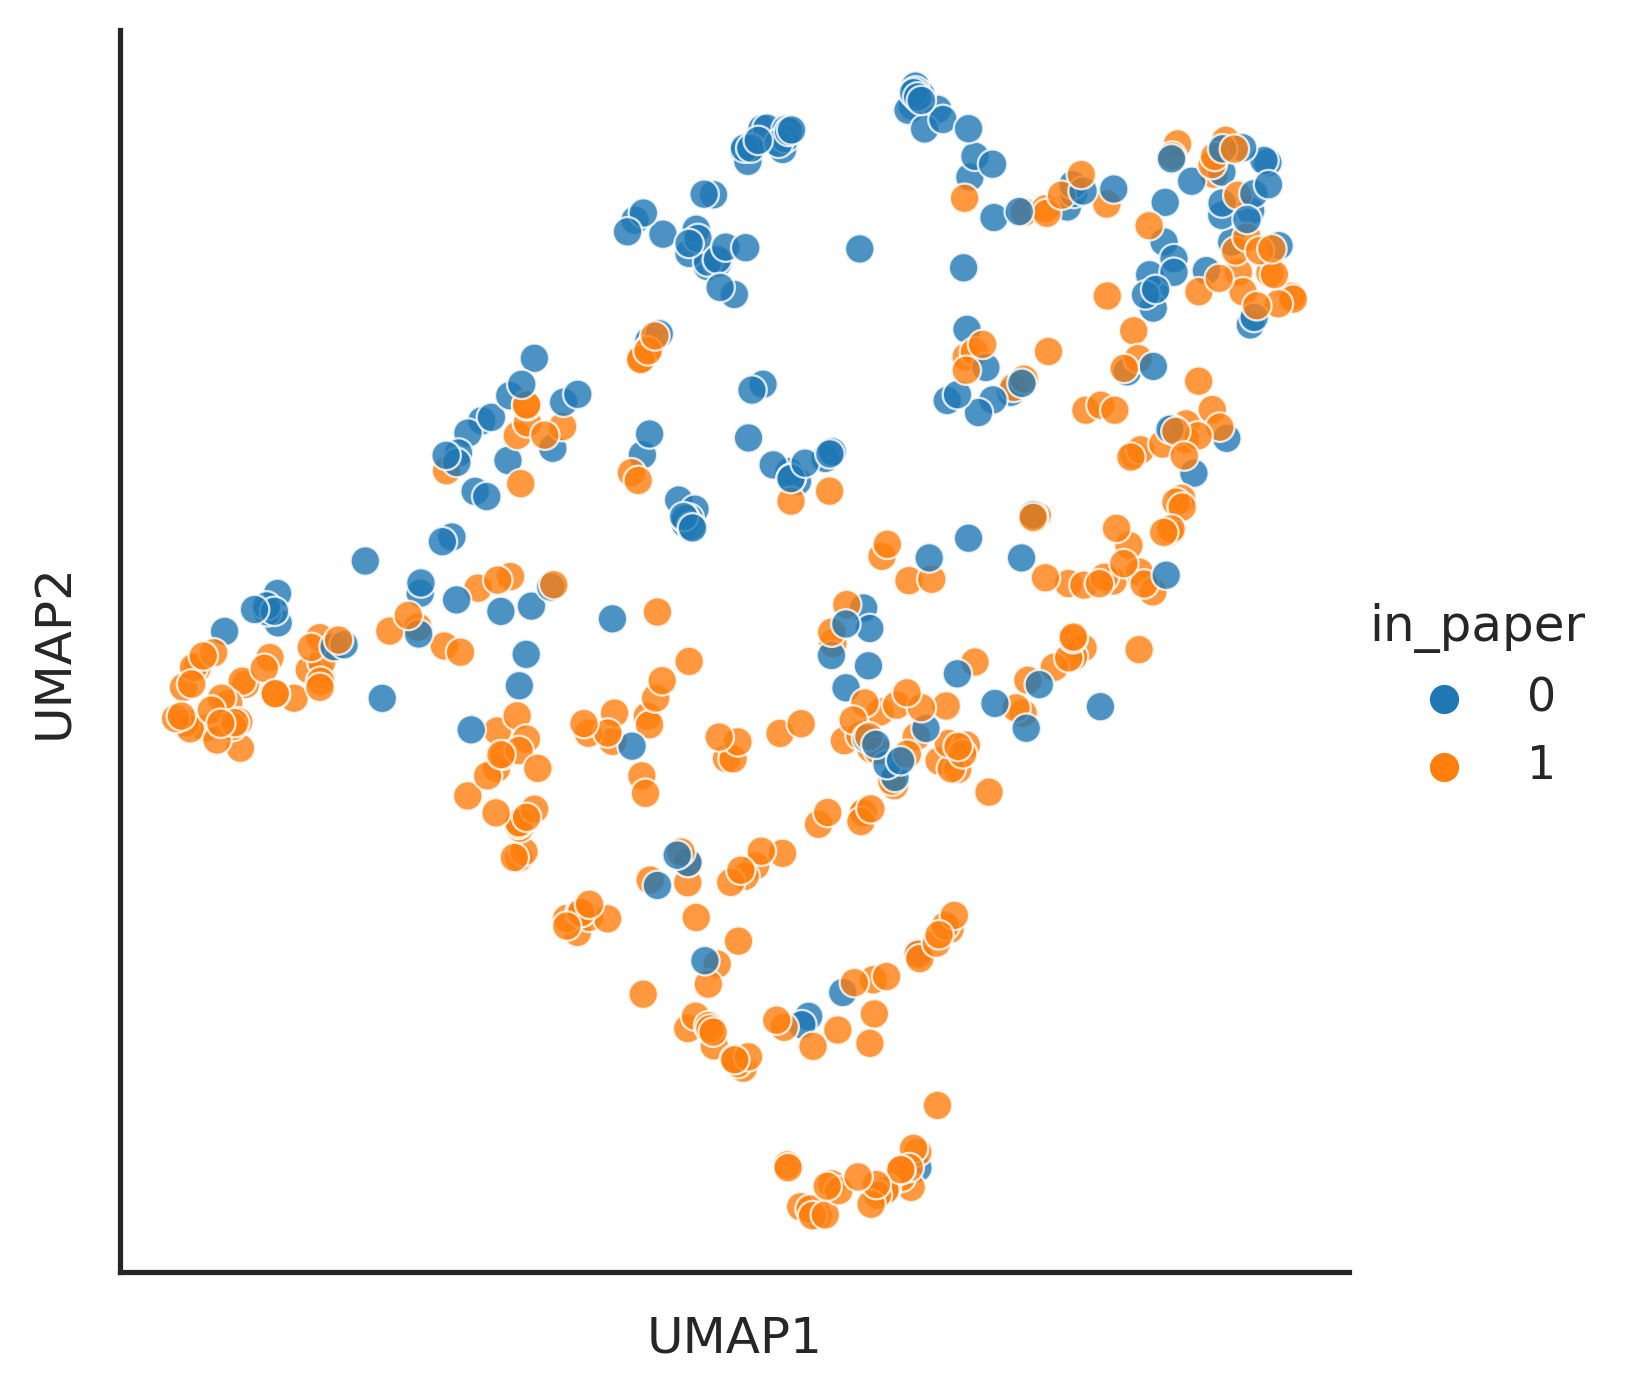

In [23]:
plot_cluster(esmfeature, hue = kinase.in_paper, legend=True, method='umap',complexity=10,palette='tab10')

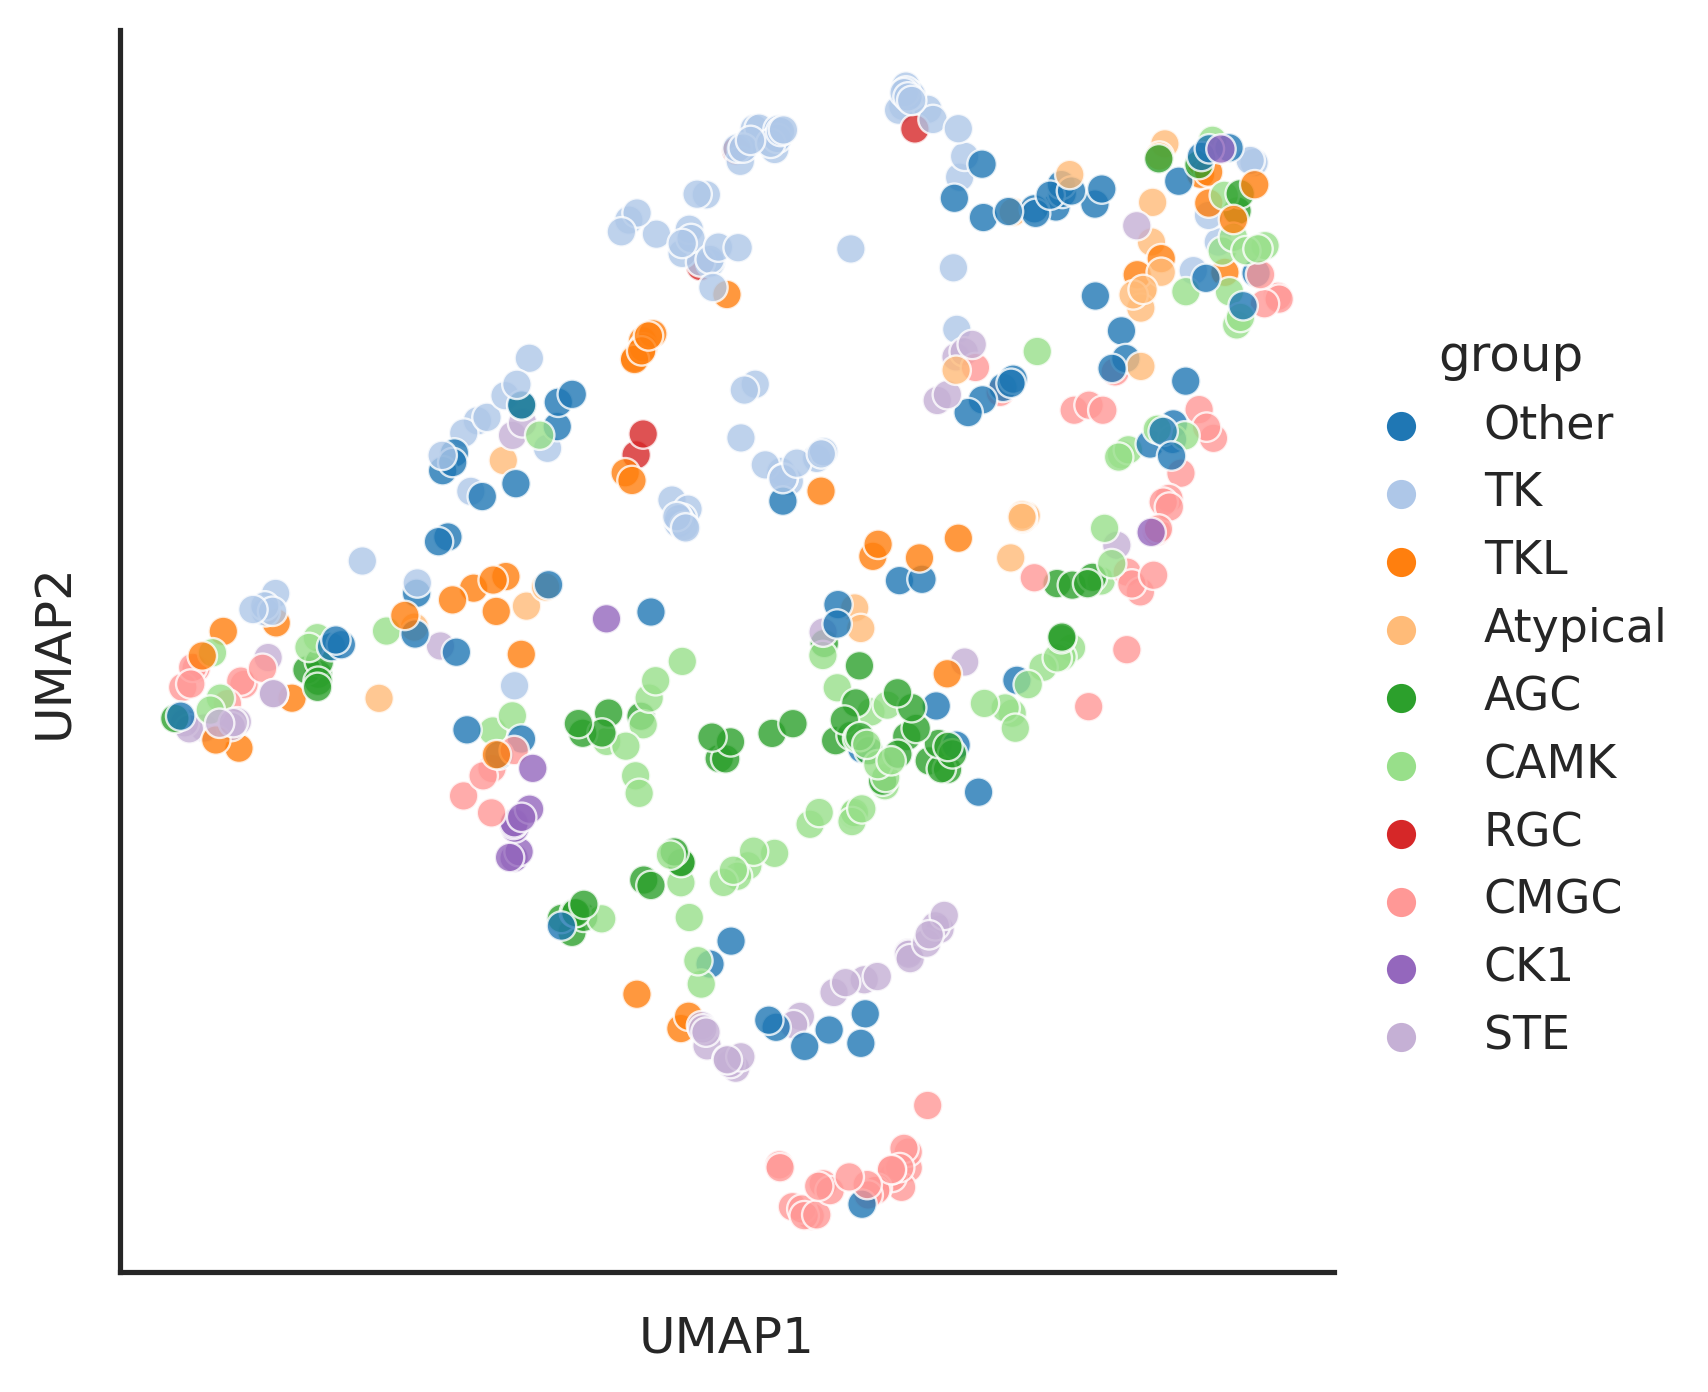

In [20]:
plot_cluster(esmfeature, hue = kinase.group, legend=True, method='umap',complexity=10)

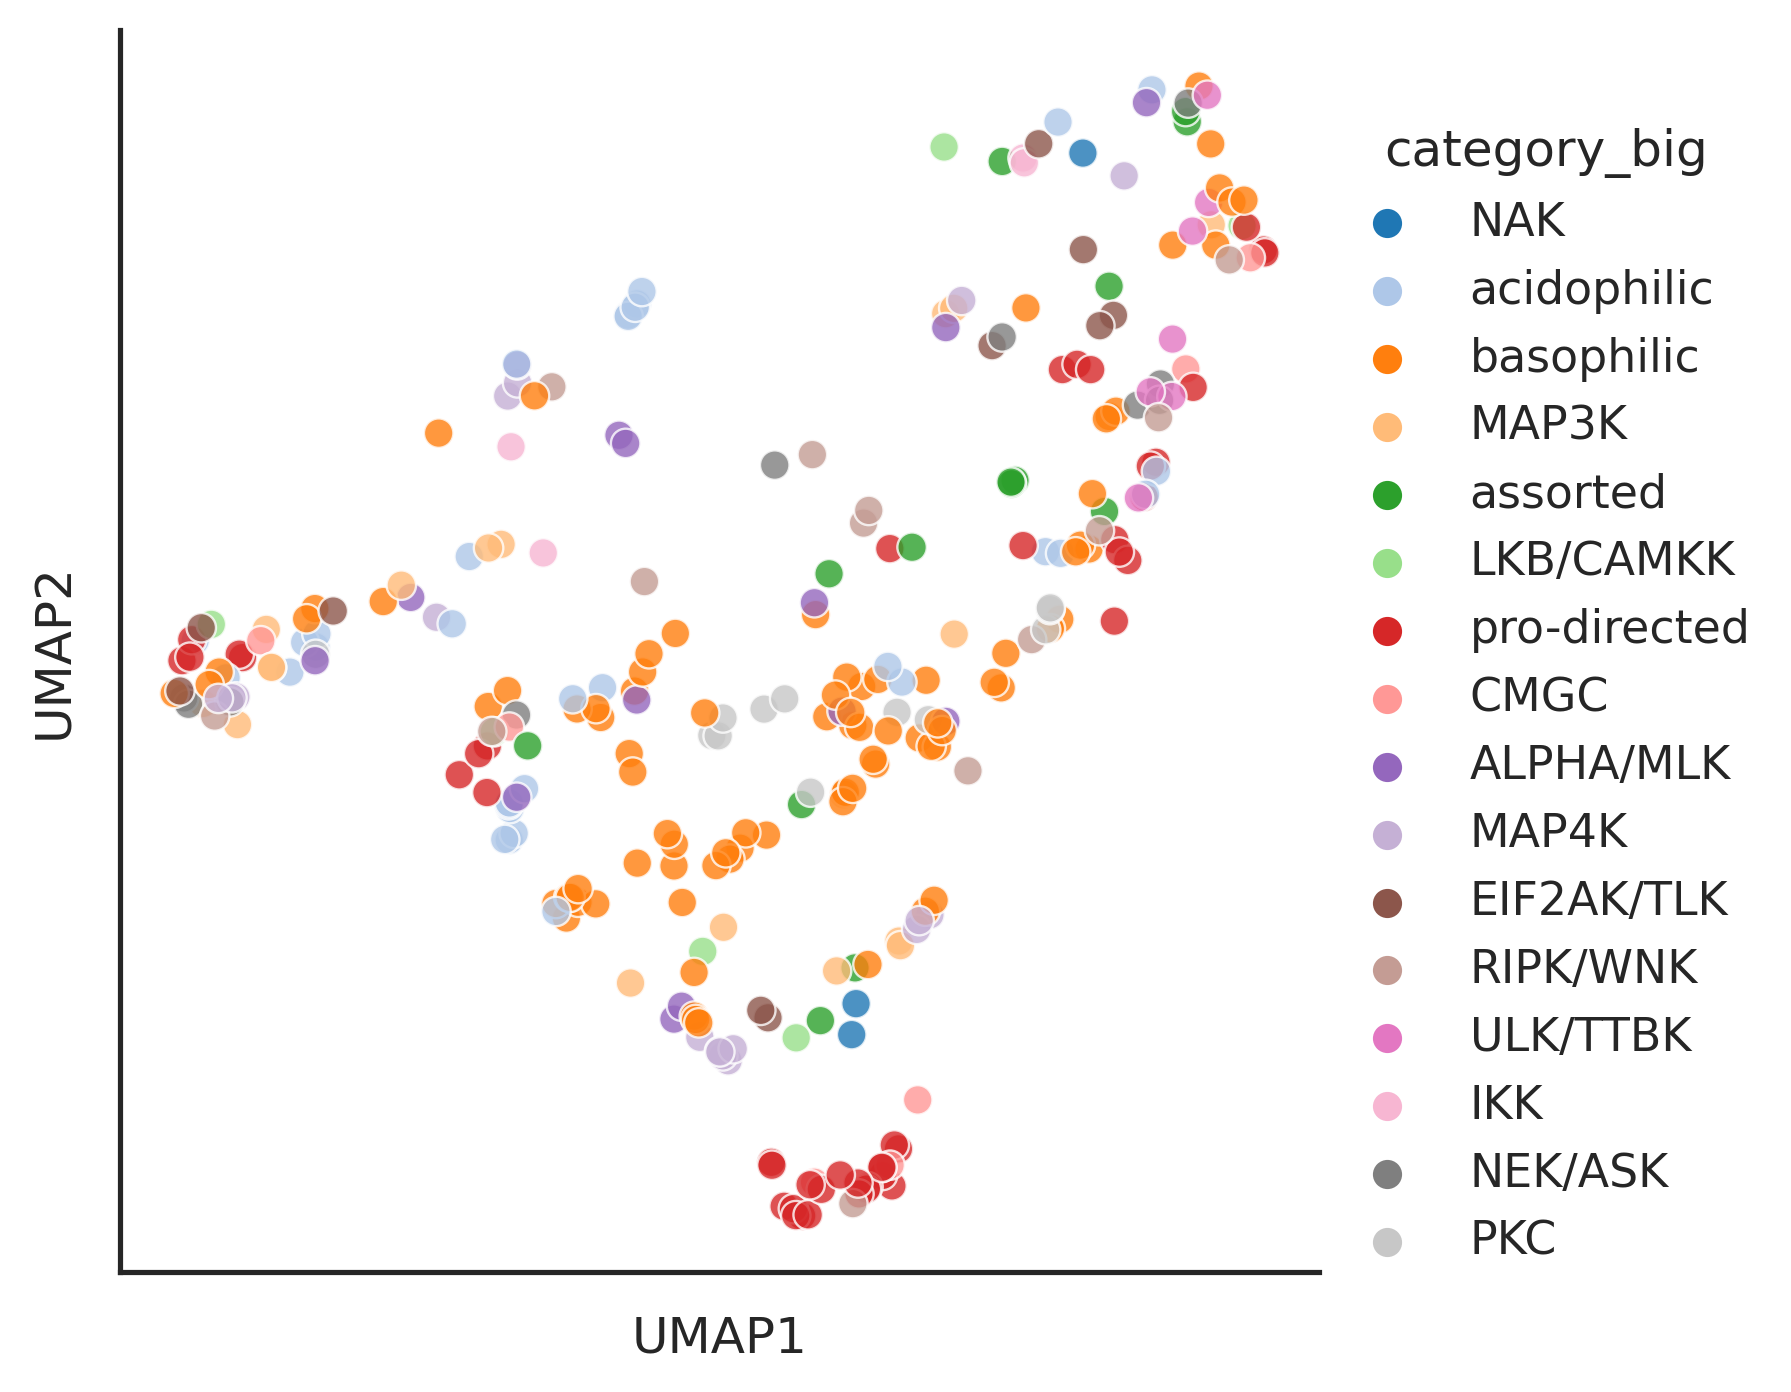

In [24]:
plot_cluster(esmfeature, hue = kinase.category_big, legend=True, method='umap',complexity=10)

### PCA reduce

As the number of features is large (1280), we can reduce the feature number using PCA

In [36]:
pcafeature = reduce_dim(esmfeature, n_components=32, save = 'pca.pkl') # save the pca for external test use

In [34]:
# I have one saved, let's take a look
pcafeature = Data.get_esm_pca32()

In [38]:
pcafeature

kinase      PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
0      AAK1 -0.216536 -0.733539 -0.344132 -0.127932 -0.132610  0.291301   
1      ABL1 -1.931181  0.637933 -0.072307 -0.004192  0.312699 -0.505472   
2      ABL2 -2.049113  0.627294 -0.178042 -0.033970  0.317264 -0.496457   
3      TNK2 -0.897787  1.145585  0.450791  0.119852  0.291064 -0.379579   
4    ACVR2A  2.334374  0.541910  0.152021 -0.329498 -0.281199 -0.076041   
..      ...       ...       ...       ...       ...       ...       ...   
490    YSK1 -0.473877 -0.397583 -0.311284  0.208740  0.050167 -0.247922   
491     ZAK  1.214596  1.164592 -0.515275 -0.487824 -0.052891 -0.050174   
492   ZAP70 -0.961741 -0.598063  0.092729 -0.263724  0.178804 -0.542081   
493   EEF2K -0.243912  0.814265 -0.256356 -0.413068  0.259178  0.404064   
494  FAM20C -1.971585  1.099476  0.194915 -0.224542  0.269599  0.328939   

         PCA7      PCA8      PCA9     PCA10     PCA11     PCA12     PCA13  \
0    0.276494  0.436058  0.082788 -0.154063  0.160541 -0.139224 -0.247439   
1    0.126391 -0.011443 -0.275725  0.048726  0.072631  0.195608 -0.084052   
2    0.108249  0.013552 -0.162668 -0.049824  0.011710  0.185277  0.059653   
3   -0.084300  0.251828 -0.216226 -0.161202  0.053384  0.148679  0.004575   
4    0.543239  0.291028 -0.041603  0.406730 -0.103986  0.035481  0.096844   
..        ...       ...       ...       ...       ...       ...       ...   
490  0.228858  0.175498 -0.158101  0.250185 -0.020005 -0.318285 -0.154324   
491 -0.210747  0.017626 -0.121399 -0.026391 -0.188110  0.255689  0.021568   
492  0.057923  0.028223 -0.086899 -0.040327 -0.106096  0.187965  0.361594   
493 -0.239692 -0.092010 -0.234838  0.231950  0.021272 -0.089948  0.233680   
494 -0.006712 -0.116632  0.823896 -0.031519  0.052633 -0.257507 -0.106640   

        PCA14     PCA15     PCA16     PCA17     PCA18     PCA19     PCA20  \
0   -0.063943  0.057066 -0.150830  0.057855 -0.122795  0.142576 -0.221901   
1    0.051477 -0.101765  0.087466  0.137332 -0.015060 -0.075581  0.053610   
2    0.033002 -0.039271  0.129896  0.125873 -0.018505  0.008883  0.053466   
3   -0.057938 -0.211485 -0.108984 -0.102767  0.052744  0.024914  0.082047   
4   -0.057820 -0.149683  0.002578 -0.164250 -0.168847  0.275815 -0.189452   
..        ...       ...       ...       ...       ...       ...       ...   
490 -0.117409  0.112570 -0.058825  0.156793  0.023934 -0.156876  0.183449   
491  0.082582  0.072443 -0.049319 -0.093820 -0.017787 -0.060525  0.057111   
492  0.178765 -0.206575  0.019424  0.226420 -0.133294 -0.007085 -0.041240   
493  0.177009  0.096384  0.064040 -0.052204 -0.137078 -0.027148  0.139156   
494  0.465866 -0.263374  0.115955  0.137949 -0.252884 -0.066652 -0.041377   

        PCA21     PCA22     PCA23     PCA24     PCA25     PCA26     PCA27  \
0    0.235763 -0.045300  0.356156  0.054661 -0.045689 -0.025929  0.052020   
1    0.056460 -0.138720 -0.159961  0.052970  0.058027 -0.077052 -0.087574   
2    0.009390 -0.046305 -0.038251  0.058864  0.023519 -0.034165 -0.029723   
3    0.034711 -0.238065  0.016293  0.037802  0.210189 -0.026749  0.108752   
4   -0.309185  0.070145 -0.008598  0.006581  0.152897  0.019459  0.025008   
..        ...       ...       ...       ...       ...       ...       ...   
490 -0.013439 -0.026422 -0.130700  0.002850 -0.074372  0.008645 -0.139524   
491 -0.029580 -0.054968 -0.070507 -0.005579  0.105611  0.004591  0.101806   
492  0.156837  0.046983  0.073396 -0.115578 -0.039168 -0.036261 -0.134783   
493 -0.083920 -0.063223  0.116162  0.080312 -0.052846  0.058539 -0.095876   
494  0.335300  0.139009 -0.188178  0.040016 -0.424064  0.092619  0.047059   

        PCA28     PCA29     PCA30     PCA31     PCA32  
0   -0.077995 -0.088119 -0.108239  0.143381  0.056745  
1    0.102688 -0.040487 -0.031497  0.121038 -0.074037  
2    0.029638 -0.046143 -0.050097  0.096799 -0.070306  
3   -0.022736 -0.019896 -0.077149  0.053095 -0.056225  
4    0.173520  0.004441 -0.035837  0.017259  0.19

In [39]:
pcafeature.shape

(495, 33)

In [41]:
esmfeature.to_csv('esm_full.csv',index=False)
pcafeature.to_csv('esm_pca32_full.csv',index=False)

## T5

The T5 (Text-To-Text Transfer Transformer) model is a transformer-based model. It consists of a transformer encoder-decoder framework. The encoder processes the input text, and the decoder generates the output text. Both the encoder and decoder are transformer models that use self-attention mechanisms to capture the relationships between words in the input and output sequences.

In [3]:
from transformers import T5Tokenizer, T5EncoderModel, T5Model
import torch
import re

In [4]:
df = Data.get_kinase_info_full()

In [5]:
device = 'cuda'

### T5_XL_UniRef50

UniRef50 is a cluster database from the UniProt Knowledgebase. It groups similar sequences based on 50% sequence identity using the CD-HIT algorithm. 

The Prot T5 is pretrained using this database.

In [6]:
# Reference: https://github.com/agemagician/ProtTrans/tree/master/Embedding/PyTorch/Advanced
# Load the tokenizer
tokenizer = T5Tokenizer.from_pretrained('Rostlab/prot_t5_xl_half_uniref50-enc', do_lower_case=False)

# Load the model
model = T5EncoderModel.from_pretrained("Rostlab/prot_t5_xl_half_uniref50-enc").to(device)

# Set the model precision based on the device
model.half()

T5EncoderModel(
  (shared): Embedding(128, 1024)
  (encoder): T5Stack(
    (embed_tokens): Embedding(128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=4096, bias=False)
              (k): Linear(in_features=1024, out_features=4096, bias=False)
              (v): Linear(in_features=1024, out_features=4096, bias=False)
              (o): Linear(in_features=4096, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 32)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=1024, out_features=16384, bias=False)
              (wo): Linear(in_features=16384, out_features=1024, bias=False)
              (dropout): Dropo

In [7]:
def T5_UR_embeddings(sequence, device = 'cuda'):
    
    seq_len = len(sequence)
    
    # Prepare the protein sequences as a list
    sequence = [" ".join(list(re.sub(r"[UZOB]", "X", sequence)))]
    
    # Tokenize sequences and pad up to the longest sequence in the batch
    ids = tokenizer.batch_encode_plus(sequence, add_special_tokens=True, padding="longest")
    input_ids = torch.tensor(ids['input_ids']).to(device)
    attention_mask = torch.tensor(ids['attention_mask']).to(device)
    
    # Generate embeddings
    with torch.no_grad():
        embedding_rpr = model(input_ids=input_ids, attention_mask=attention_mask)
    
    emb_mean = embedding_rpr.last_hidden_state[0][:seq_len].detach().cpu().numpy().mean(axis=0)
    
    return emb_mean

In [9]:
df.sort_values(by='length',ascending=False).length[:5]

495    32759
320     7968
319     7968
124     4128
487     3859
Name: length, dtype: int64

In [12]:
df = df.query('length < 5000').reset_index(drop=True)

In [13]:
series = df['sequence'].progress_apply(T5_UR_embeddings)

  0%|          | 0/520 [00:00<?, ?it/s]

In [14]:
# output to a dataframe
T5_feature = pd.DataFrame(series.tolist(),index=df.kinase).reset_index()

In [15]:
T5_feature.to_csv('T5_xl_uniref50_full.csv',index=False)

#### Visualize

In [25]:
T5_feature = Data.get_t5_full()

df = Data.get_kinase_info_full()

In [30]:
T5_feature = T5_feature.drop_duplicates('kinase').reset_index(drop=True)

In [37]:
df = T5_feature[['kinase']].merge(df,'left').drop_duplicates('kinase').reset_index(drop=True)

In [39]:
(df.kinase == T5_feature.kinase).value_counts()

True    514
Name: kinase, dtype: int64

PCA

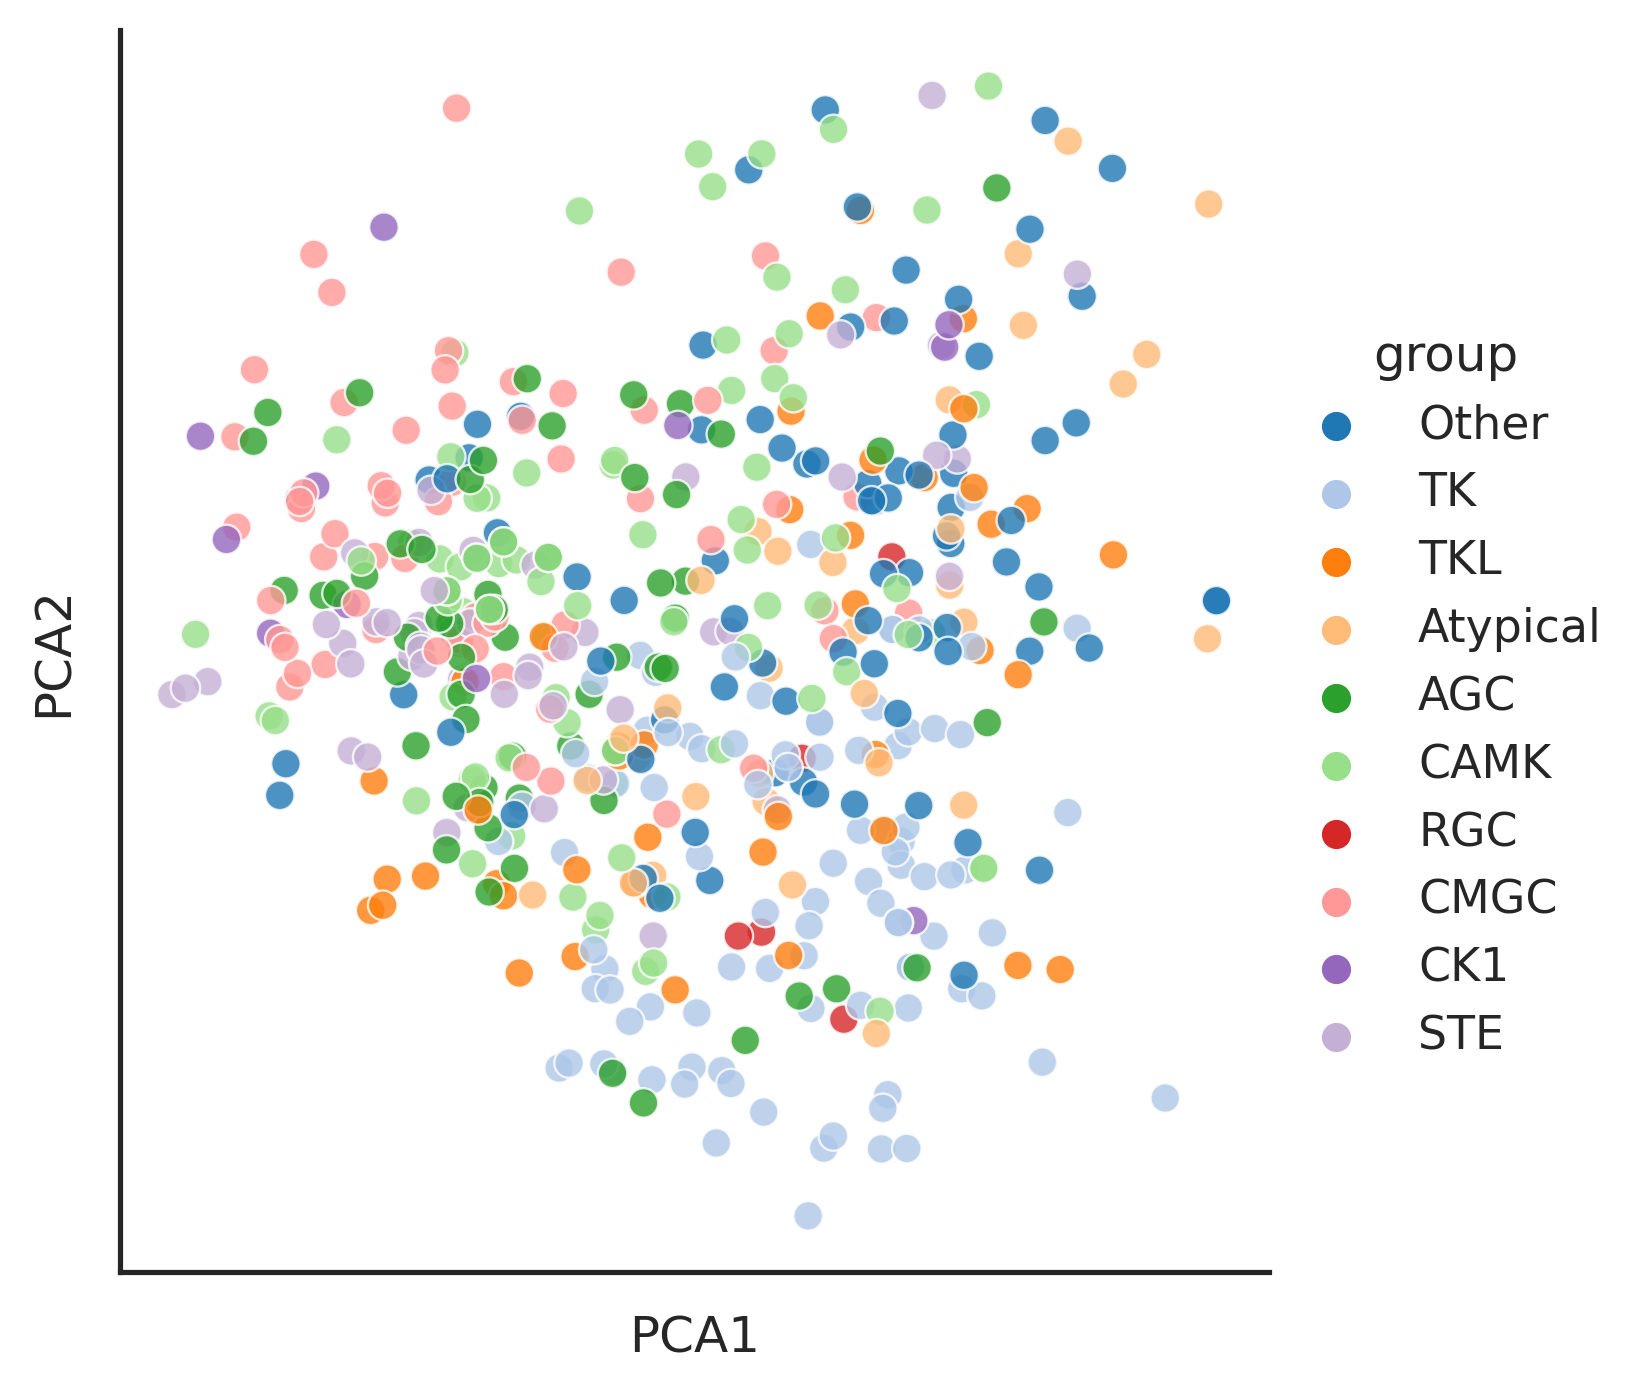

In [16]:
plot_cluster(T5_feature,'pca',hue=df.group,legend=True)

UMAP

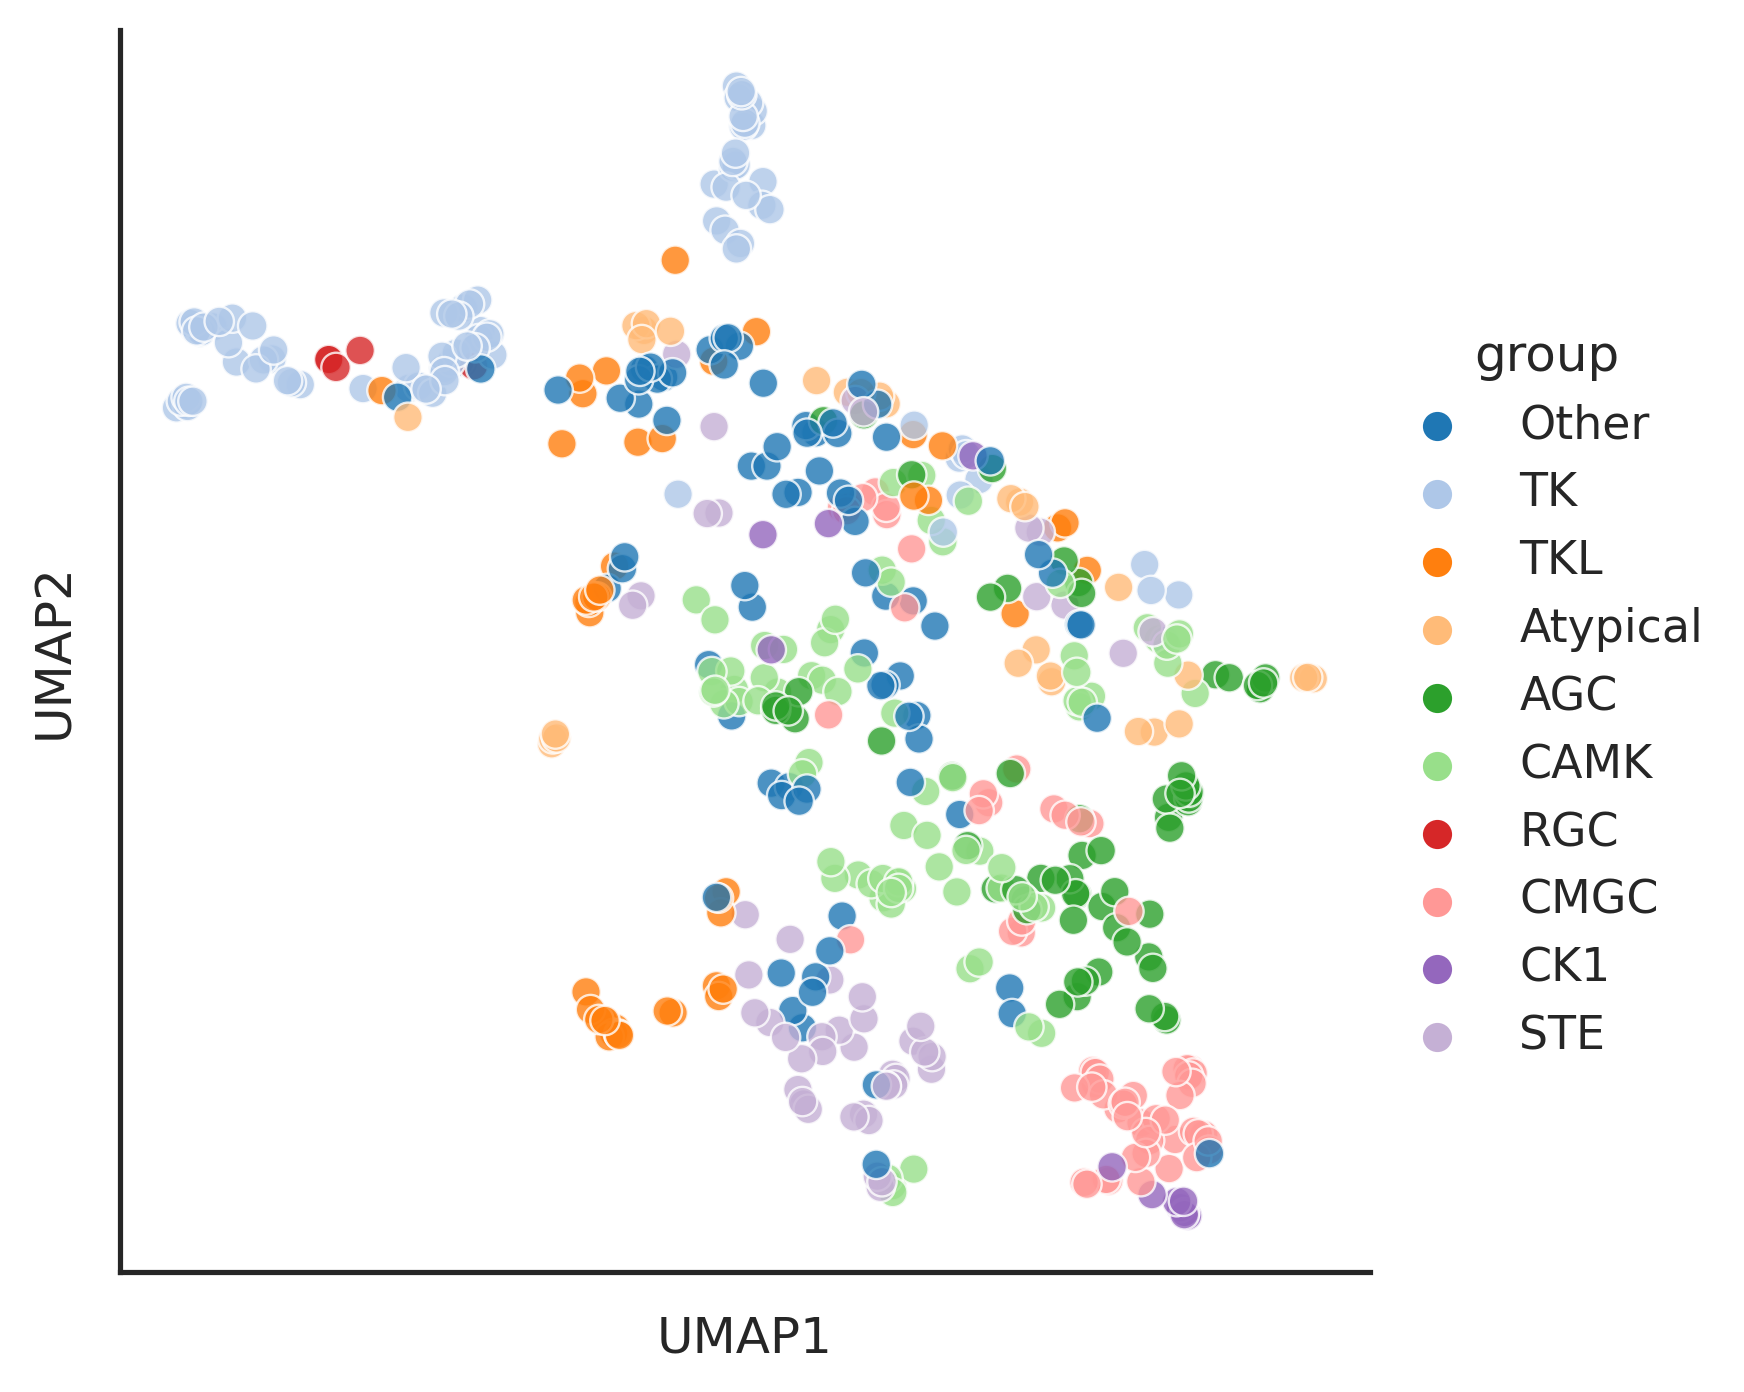

In [46]:
plot_cluster(T5_feature,'umap',hue=df.group,legend=True, complexity=13)

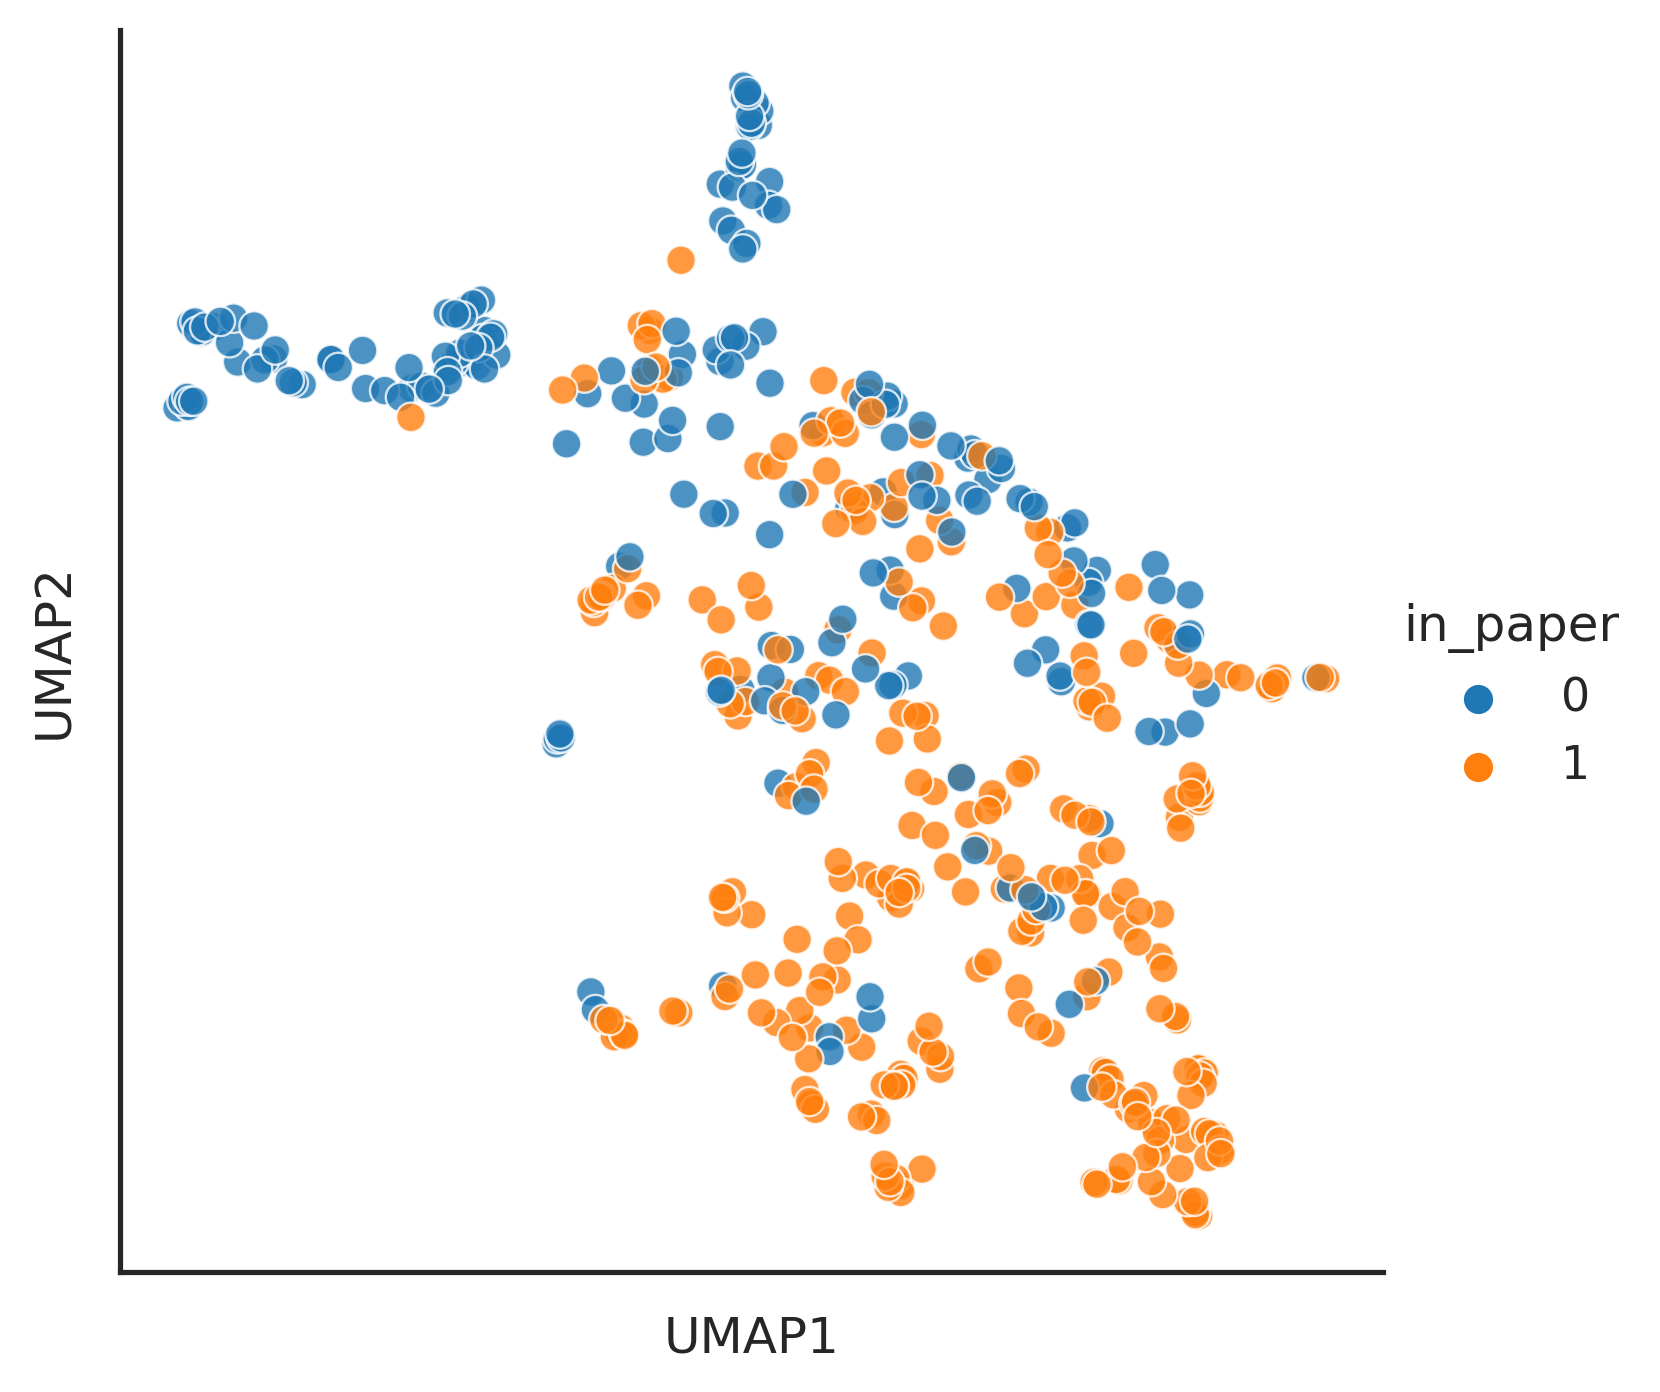

In [48]:
plot_cluster(T5_feature,'umap',hue=df.in_paper,legend=True, complexity=13,palette='tab10')

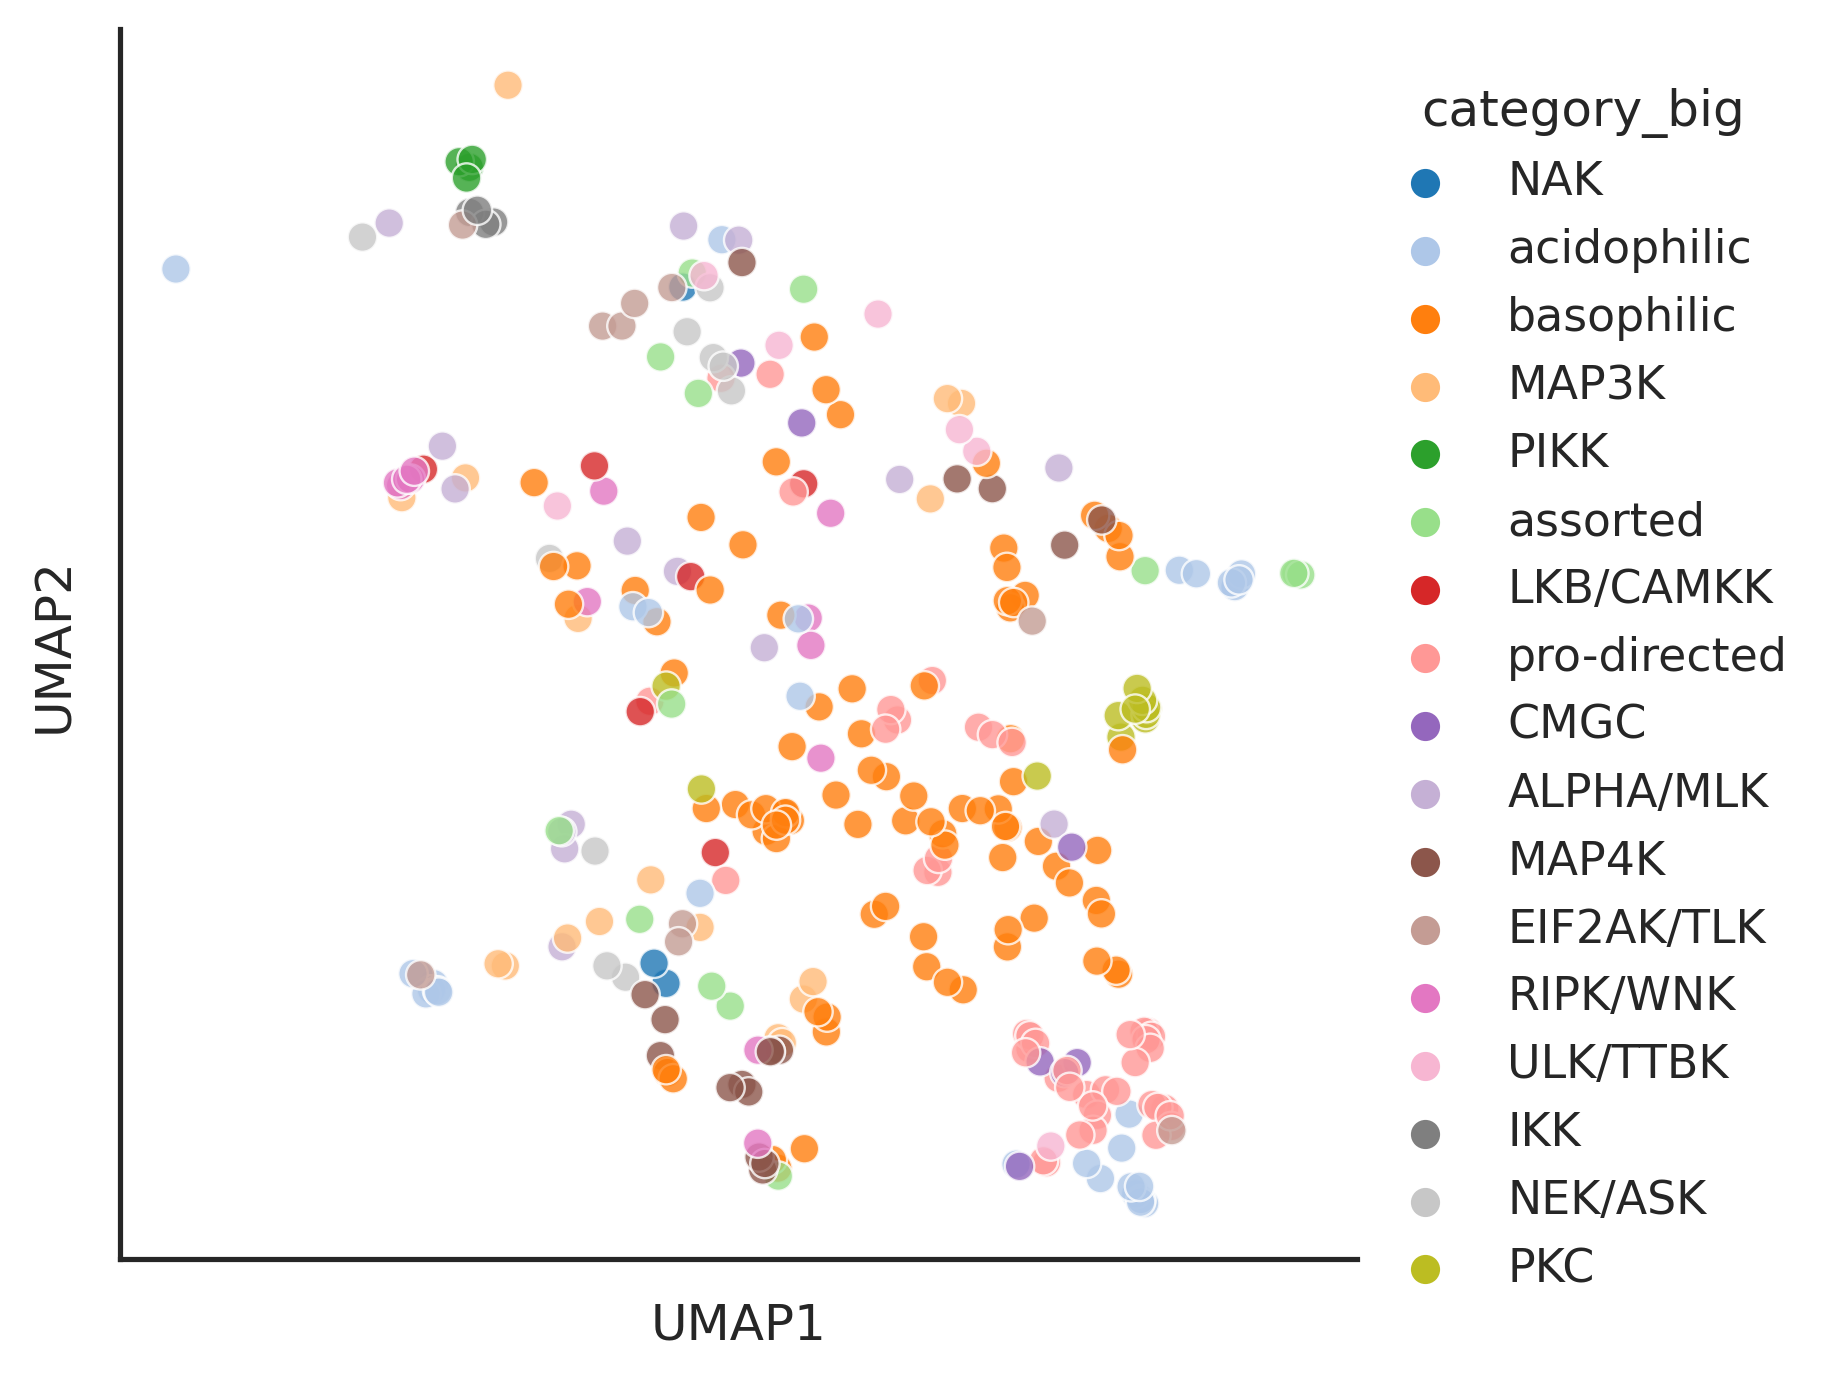

In [50]:
plot_cluster(T5_feature,'umap',hue=df.category_big,legend=True, complexity=13)

Use UMAP to reduce dimension to 32

In [19]:
t5_umap32 = reduce_dim(T5_feature, 'umap', 32, complexity = 10)

In [20]:
t5_umap32.to_csv('t5_umap32_full.csv',index=False)

### T5_XL_BFD

BFD is a database created by clustering 2.5 billion protein sequences from various sources including Uniprot/TrEMBL+Swissprot.

In [ ]:
tokenizer = T5Tokenizer.from_pretrained('Rostlab/prot_t5_xl_bfd', do_lower_case=False)

model = T5Model.from_pretrained("Rostlab/prot_t5_xl_bfd").to(device)

model.eval()

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/457 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.5G [00:00<?, ?B/s]

T5Model(
  (shared): Embedding(128, 1024)
  (encoder): T5Stack(
    (embed_tokens): Embedding(128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=4096, bias=False)
              (k): Linear(in_features=1024, out_features=4096, bias=False)
              (v): Linear(in_features=1024, out_features=4096, bias=False)
              (o): Linear(in_features=4096, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 32)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=1024, out_features=16384, bias=False)
              (wo): Linear(in_features=16384, out_features=1024, bias=False)
              (dropout): Dropout(p=0.

In [ ]:
def T5_bfd_embeddings(sequence, device = 'cuda'):
    
    seq_len = len(sequence)
    
    # Prepare the protein sequences as a list
    sequence = [" ".join(list(re.sub(r"[UZOB]", "X", sequence)))]
    
    # Tokenize sequences and pad up to the longest sequence in the batch
    ids = tokenizer.batch_encode_plus(sequence, add_special_tokens=True, padding="longest")
    input_ids = torch.tensor(ids['input_ids']).to(device)
    attention_mask = torch.tensor(ids['attention_mask']).to(device)
    
    # Generate embeddings
    with torch.no_grad():
        embedding_rpr = model(input_ids=input_ids, attention_mask=attention_mask, decoder_input_ids = input_ids)
    
    emb_mean = embedding_rpr.last_hidden_state[0][:seq_len].detach().cpu().numpy().mean(axis=0)
    
    return emb_mean

As our RAM is limited, we need to get sequence below 1000

In [ ]:
df['length'] = df.sequence.apply(len)

In [ ]:
df = df.query('length < 1000')

In [ ]:
series = df['sequence'].progress_apply(T5_bfd_embeddings)

  0%|          | 0/293 [00:00<?, ?it/s]

In [ ]:
# output to a dataframe
T5_feature = pd.DataFrame(series.tolist(),index=df.kinase).reset_index()

In [ ]:
T5_feature.shape

(303, 1025)

In [ ]:
T5_feature.to_csv('T5_xl_bfd.csv',index=False)

In [ ]:
T5_feature= pd.read_csv('T5_xl_bfd.csv')

In [ ]:
df2 = df.query('length < 1000')

#### Visualize

Since PCA plot cannot reflect the cluster very well, we use umap; after trying different n_neigbors (complexity) value, we found 10 is the best; the lower, the more clustered the dots

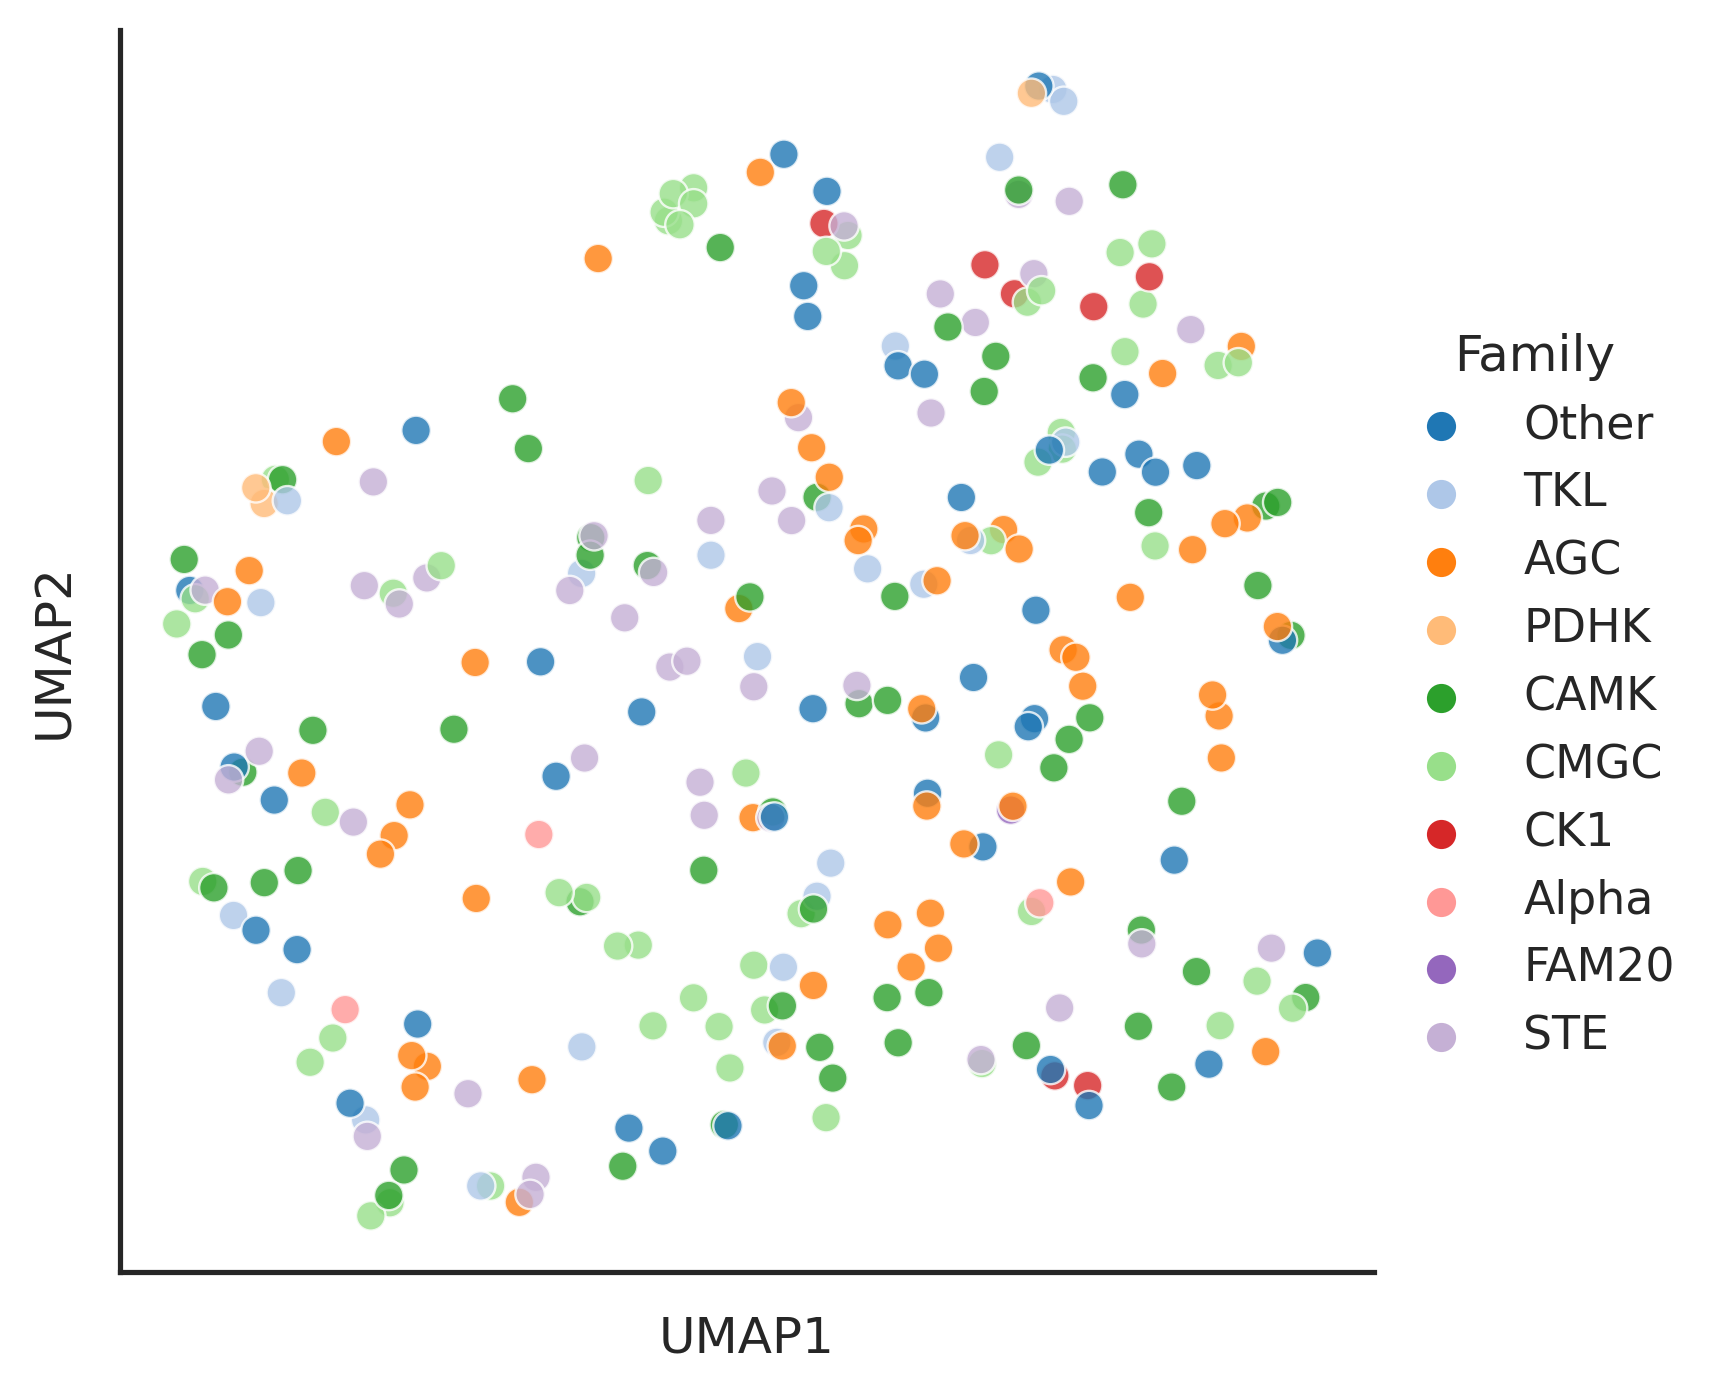

In [ ]:
plot_cluster(T5_feature,'umap',hue=df.Family,legend=True, complexity=10)

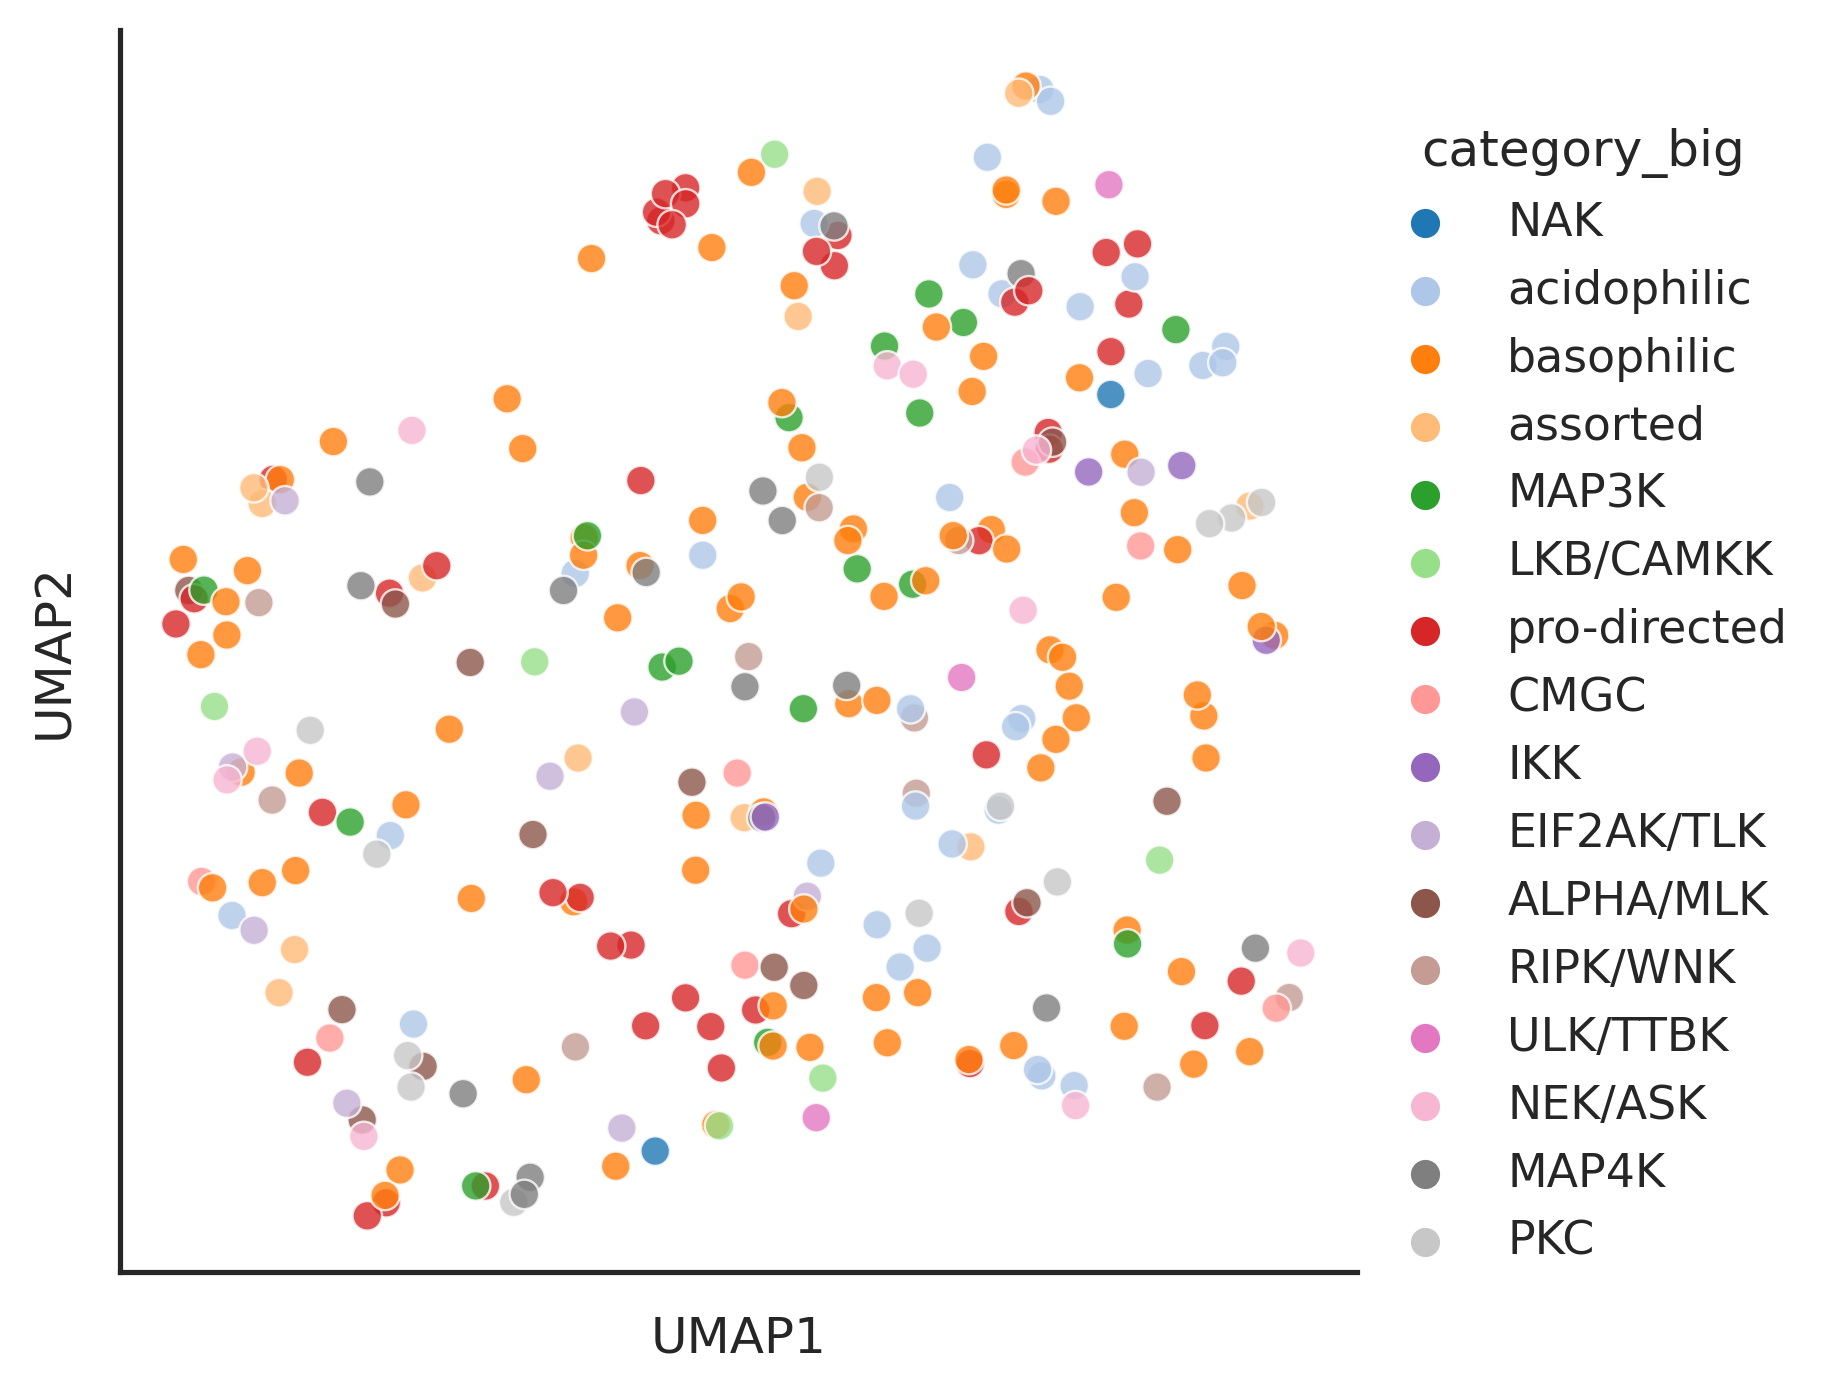

In [ ]:
plot_cluster(T5_feature,'umap',hue=df.category_big,legend=True, complexity=10)